In [47]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns     

In [48]:
# Đọc và in ra thử 5 giá trị đầu của file
df = pd.read_csv('./score_college_exam_data/score_college_exam_data.csv', index_col = 'Unnamed: 0')
df.head()

,Year,sbd,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24008611,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51000032,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51000005,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51000021,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51000013,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50


In [49]:
# Drop many duplicated rows
df.drop_duplicates(inplace=True)
# df_2019_2020 = df[((df['Year'] == 2019 )| (df['Year'] == 2020))]
df.reset_index()
df.index =  pd.RangeIndex(start=0, stop=3660578, step=1)


### So sánh điểm toán giữa các năm

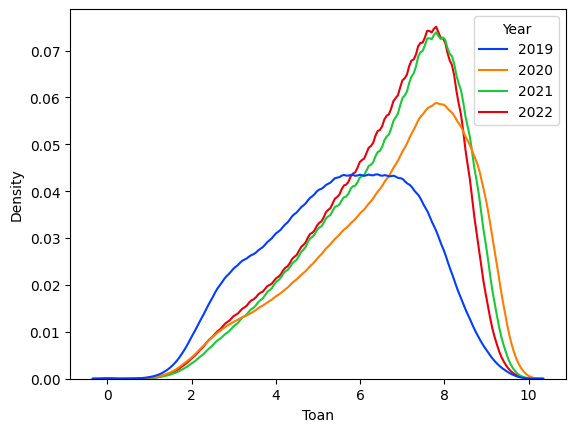

In [50]:
sns.kdeplot(data= df, x='Toan', hue='Year', palette='bright')
plt.show()

- Điểm yếu vị (mode - giá trị xuất hiện nhiều nhất) của cả 3 năm (2020-2022) đều giống nhau là 7,8. Phân bố điểm Toán năm nay không khác gì 2 năm trước, đường lên cũng dốc mà đường xuống còn dốc hơn. Điều này có thể chỉ ra rằng tính phân loại thí sinh của đề Toán năm nay không được tốt, khi mà độ khó của các câu hỏi chỉ nằm ở hai thái cực: cực dễ và cực khó.
- Tuy nhiên, năm 2019 thì có 1 khoảng nằm ngang ở giữa, điểm yếu vị 6.4, thể hiện việc đề thi có phân loại tốt: câu dễ, trung bình và khó.

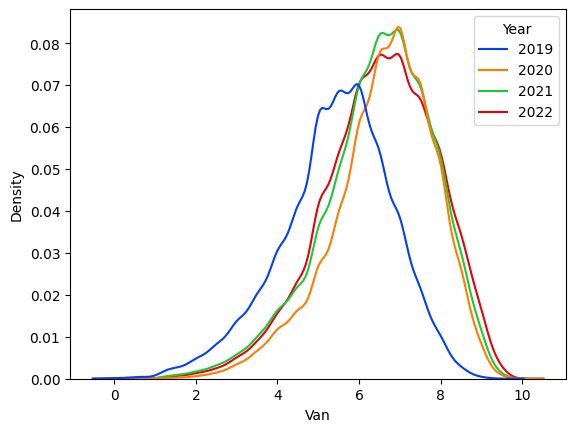

In [51]:

# Compare literature between 2 years
sns.kdeplot(data=df, x='Van', hue='Year', palette='bright', bw_adjust=2)
plt.show()

- Điểm văn nhìn chung khá bình thường.

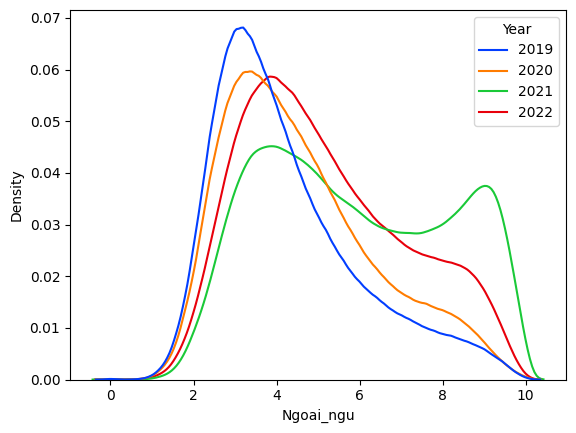

In [52]:
sns.kdeplot(data= df, x='Ngoai_ngu', hue='Year', palette='bright')
plt.show()

- Hầu hết các năm đều ổn định tuy nhiên, năm 2021 đồ thị có 2 đỉnh (một đỉnh cho nhóm học sinh kém ở 4 điểm và đỉnh còn lại cho nhóm học sinh giỏi ở 9 điểm). 
- Ở đây có sự chênh lệch vùng miền rất lớn về chất lượng dạy và học ngoại ngữ, tại những vùng thành phố hoặc vùng kinh tế phát triển, môn tiếng Anh được đầu tư tốt hơn. Tuy nhiên, biểu đồ Histogram năm 2019, 2020 có hình dạng phân bố rất bình thường. Giáo dục không thể chỉ trong 1 năm mà có thể thay đổi chất lượng dạy và học như vậy.
- Rút kinh nghiệm, năm 2022 đồ thị có xu hướng trở lại dạng bình thường.

In [71]:
f = open('Matinh.txt', "r", encoding="utf-8")
f = f.read()
f = f.replace('\n','')
f = f.replace(' – ','  - ')
f = f.split("Mã tỉnh: ")
Matinh = {}
f.remove('')
for i in f:
    i = i.split(" - ")
    Matinh[int(i[0])] = i[1]
Matinh
df


,Year,MaTinh,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50
...,...,...,...,...,...,...,...,...,...,...,...
3660573,2022,64,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
3660574,2022,64,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
3660575,2022,64,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
3660576,2022,64,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


In [92]:
import geopandas as gpd
map_df = gpd.read_file('./diaphantinh.geojson')
map_df.head()

,gid,code,ten_tinh,geometry
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ..."
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8..."
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ..."
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ..."
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9..."


In [69]:
# Fix some typo errors
map_df.loc[44, 'ten_tinh'] = 'Quảng Bình'
map_df.loc[31, 'ten_tinh'] = 'Kiên Giang'
map_df.loc[12, 'ten_tinh'] = 'Cần Thơ'

In [70]:
df["sbd"] = (df["sbd"]//1000000)
df.rename(columns = {'sbd':'MaTinh'}, inplace = True)

KeyError: 'sbd'

In [72]:
df

,Year,MaTinh,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD
0,2019,24,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75
1,2019,51,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN
2,2019,51,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75
3,2019,51,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00
4,2019,51,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50
...,...,...,...,...,...,...,...,...,...,...,...
3660573,2022,64,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00
3660574,2022,64,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50
3660575,2022,64,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00
3660576,2022,64,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75


In [73]:
temp = df["MaTinh"]
df["Tỉnh"] = temp.replace(Matinh)
df

,Year,MaTinh,Toan,Van,Ngoai_ngu,Li,Hoa,Sinh,Su,Dia,GDCD,Tỉnh
0,2019,24,8.2,8.00,7.6,NaN,NaN,NaN,8.25,7.75,8.75,Hà Nam
1,2019,51,8.6,6.17,8.0,8.25,4.5,6.0,NaN,NaN,NaN,An Giang
2,2019,51,5.2,4.75,NaN,NaN,NaN,NaN,4.00,4.25,5.75,An Giang
3,2019,51,4.4,4.50,NaN,NaN,NaN,NaN,2.25,4.75,5.00,An Giang
4,2019,51,5.8,6.00,4.4,NaN,NaN,NaN,7.75,8.25,7.50,An Giang
...,...,...,...,...,...,...,...,...,...,...,...,...
3660573,2022,64,8.4,6.75,4.6,NaN,NaN,NaN,6.50,6.75,9.00,Hậu Giang
3660574,2022,64,5.6,6.50,2.8,NaN,NaN,NaN,6.25,6.75,8.50,Hậu Giang
3660575,2022,64,5.8,6.00,6.6,NaN,NaN,NaN,7.25,8.00,8.00,Hậu Giang
3660576,2022,64,7.6,6.75,7.0,NaN,NaN,NaN,8.75,7.25,9.75,Hậu Giang


In [76]:
def merge_df(subject_name, map_df, df_2022):
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].std(), how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2022.groupby('Tỉnh')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='Tỉnh')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    return map_df

In [95]:

# Create statistics
df_2022 = df[df['Year'] == 2022]
for subject_name in ['Toan', 'Van', 'Ngoai_ngu', 'Su', 'GDCD']:
    map_df = merge_df(subject_name, map_df, df_2022)

map_df.head()

,gid,code,ten_tinh,geometry,Toan_avg,Toan_std,Toan_>=9,Van_avg,Van_std,Van_>=9,Ngoai_ngu_avg,Ngoai_ngu_std,Ngoai_ngu_>=9,Su_avg,Su_std,Su_>=9,GDCD_avg,GDCD_std,GDCD_>=9
0,1,AD01,An Giang,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",6.532995,1.413811,0.008830,6.832086,1.218361,0.026704,5.214294,1.572482,0.020620,6.667118,1.523206,0.035964,8.332156,0.922014,0.175622
1,2,AD01,Bà Rịa -Vũng Tàu,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",6.728949,1.434275,0.015244,6.483615,1.222594,0.007819,5.837798,1.919194,0.053629,6.041582,1.643661,0.013980,8.054292,1.028526,0.081984
2,3,AD01,Bắc Giang,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",6.469325,1.651402,0.022478,6.821436,1.266226,0.024279,5.072878,1.740398,0.023160,6.557756,1.544728,0.039556,8.238795,0.972752,0.169367
3,4,AD01,Bắc Kạn,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",5.551524,1.667308,0.007206,6.270404,1.429006,0.026859,4.205261,1.655999,0.011464,6.560808,1.610752,0.065509,8.095730,1.023468,0.174910
4,5,AD01,Bạc Liêu,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",6.678048,1.341956,0.014658,6.915358,1.010324,0.012163,5.037847,1.608973,0.017153,6.654777,1.534446,0.038048,8.292640,0.882284,0.154218


### Phân tích điểm trung bình môn Toán của các tỉnh trên Việt Nam năm 2022

In [144]:
def draw_map(variable):
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(40, 17))

    # # remove the axis
    ax.axis('off')

    map_df.plot(column=map_df[variable], cmap="Greens", linewidth=0.8, ax=ax, edgecolor='0.8')

    # Add Labels
    map_df['coords'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
    map_df['coords'] = [coords[0] for coords in map_df['coords']]
    map_df.sort_values(by=[variable], ascending=False, inplace=True)
    for idx, row in map_df[:5].iterrows():
        plt.annotate(text = row['ten_tinh'], xy=row['coords'], horizontalalignment='center')
        print(row['ten_tinh'])

Nam Định
Bình Dương
TP. Hồ Chí Minh
Ninh Bình
Thái Bình


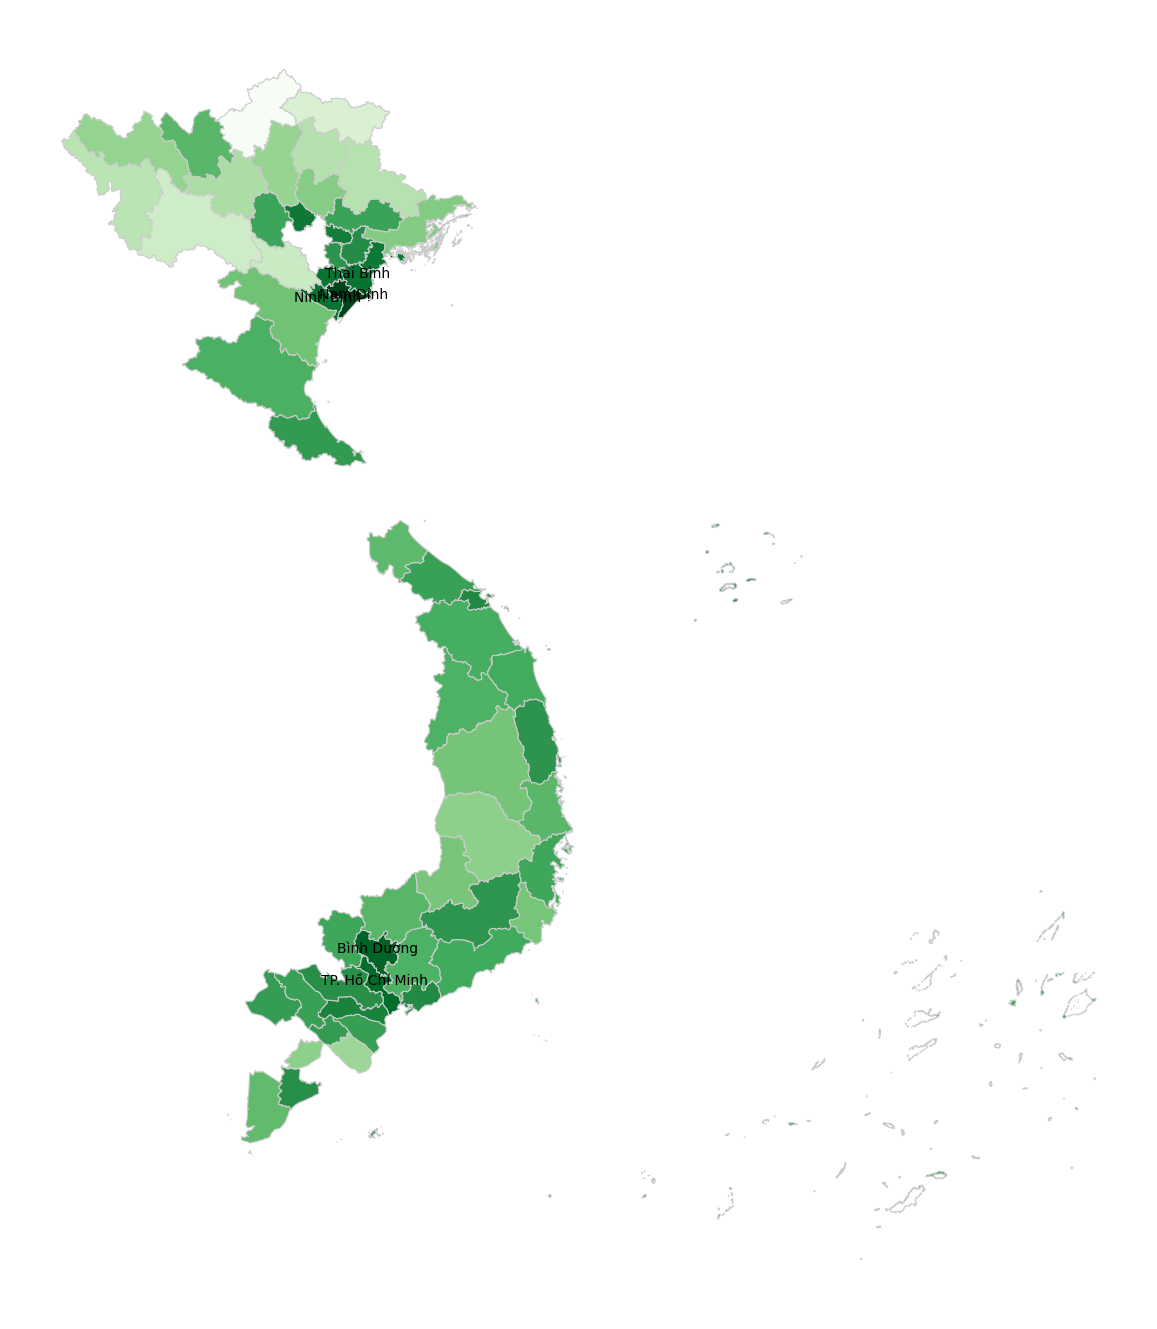

In [145]:
draw_map('Toan_avg')

Hải Phòng
Vĩnh Phúc
Hà Nam
Ninh Bình
Hà Tĩnh


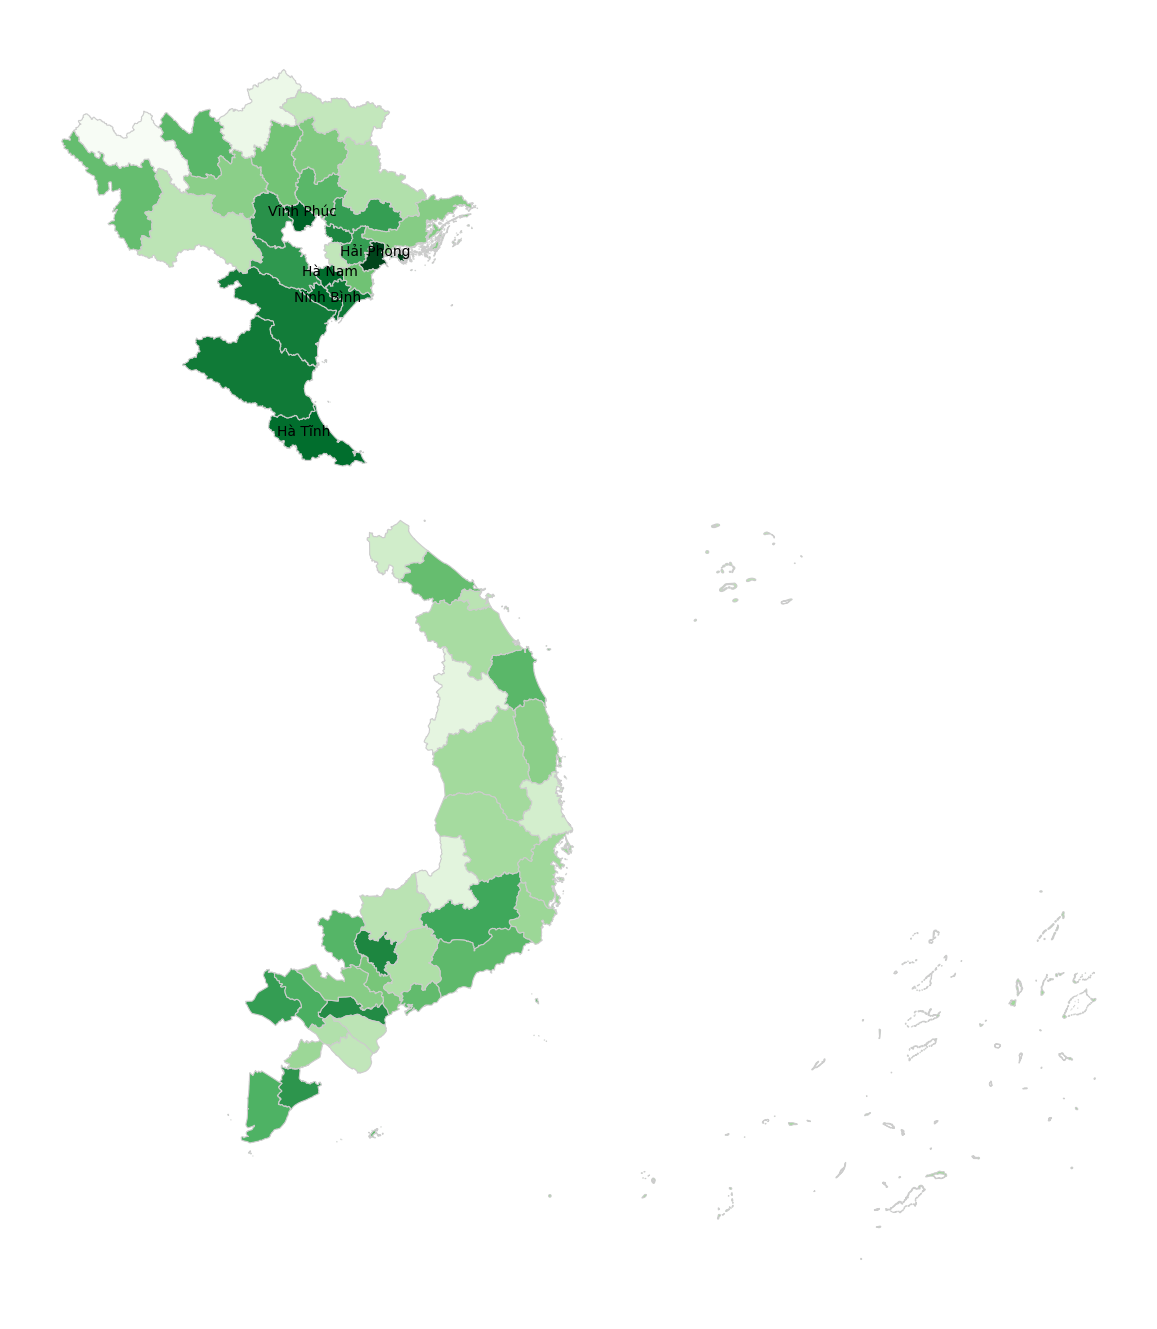

In [147]:
draw_map('Van_avg')

TP. Hồ Chí Minh
Bình Dương
Bà Rịa -Vũng Tàu
Hải Phòng
Đà Nẵng


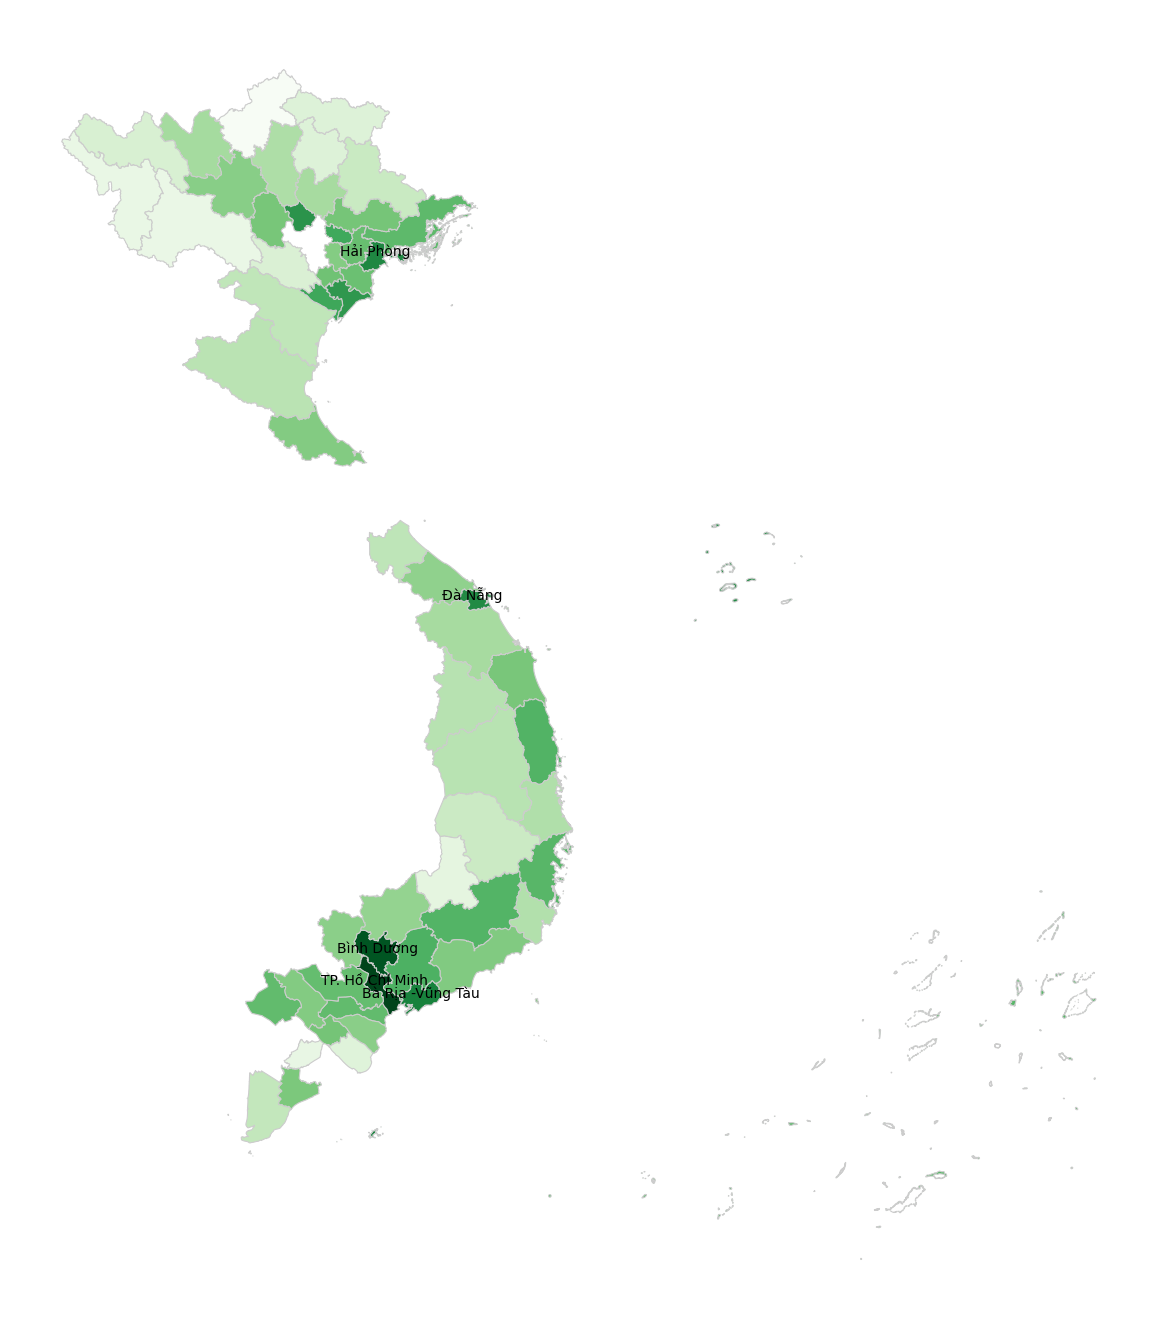

In [143]:
draw_map('Ngoai_ngu_avg')